In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/data.csv", encoding="latin1")

/tmp/ipython-input-2811317342.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding="latin1")


In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
r = 102303460
a = 0.05 * (np.mod(r,7))
b = 0.3 * (np.mod(r,5) + 1)

In [ ]:
print(f'{a.item()}, {b.item()}')

0.2, 0.8999999999999999


In [ ]:
x = df['no2'].dropna().values
x

array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ])

In [ ]:
df_z = x+a*np.sin(b*x)
df_z

array([17.40958898,  7.00336278, 28.59889988, ..., 45.06683024,
       50.1701807 , 45.89388216])

In [ ]:
mu = np.mean(df_z)

In [ ]:
sigma = np.std(df_z)

In [ ]:
lam = 1 / (2 * (sigma ** 2))
c = 1 / (sigma * np.sqrt(2 * np.pi))

In [ ]:
print(lam)
print(mu)
print(c)

0.0014593812811420303
25.804091267939096
0.02155308538235476


In [ ]:
p_z = c * np.exp( -lam * np.square(df_z - mu))
p_z

array([0.01944675, 0.01286712, 0.02130879, ..., 0.0125411 , 0.00906187,
       0.01195935])

In [ ]:
mu.item()

25.804091267939096

In [ ]:
sigma.item()

18.509752702415486

In [ ]:
lam.item()

0.0014593812811420303

In [ ]:
c.item()

0.02155308538235476

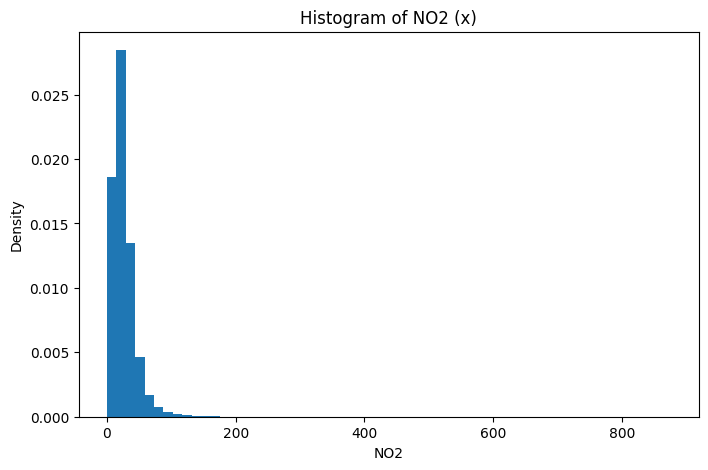

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(x, bins=60, density=True)
plt.title("Histogram of NO2 (x)")
plt.xlabel("NO2")
plt.ylabel("Density")
plt.show()

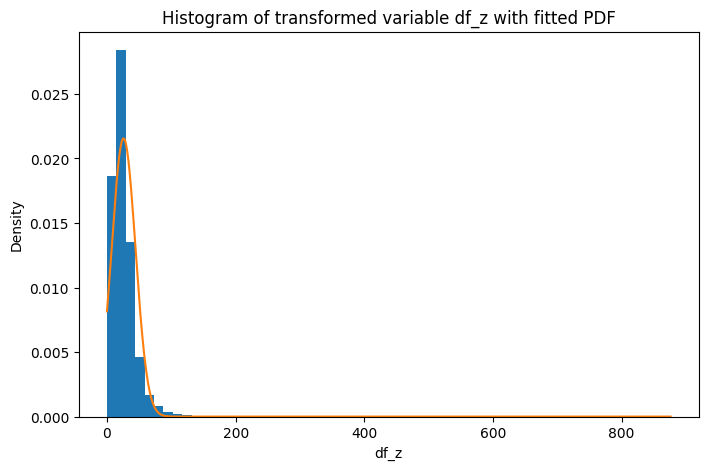

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_z, bins=60, density=True)
xx = np.linspace(df_z.min(), df_z.max(), 1000)
yy = c * np.exp(-lam * (xx - mu)**2)
plt.plot(xx, yy)
plt.title("Histogram of transformed variable df_z with fitted PDF")
plt.xlabel("df_z")
plt.ylabel("Density")
plt.show()